In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier



# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

#importing libraries of the selected algorithms
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#importing libraries of performance Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
train = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")
test = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")
df=pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")
train.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
train.shape

(303, 14)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
train.isnull().sum()#have to do anything for null value?no

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
print("Number of rows:",train.shape[0])
print("Number of columns:",train.shape[1])

Number of rows: 303
Number of columns: 14


In [7]:
train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

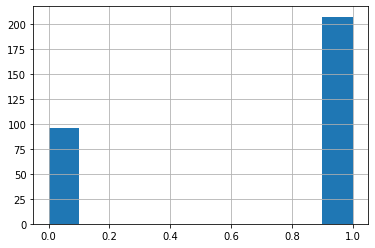

In [8]:
train['sex'].hist()#(1 = male; 0 = female)

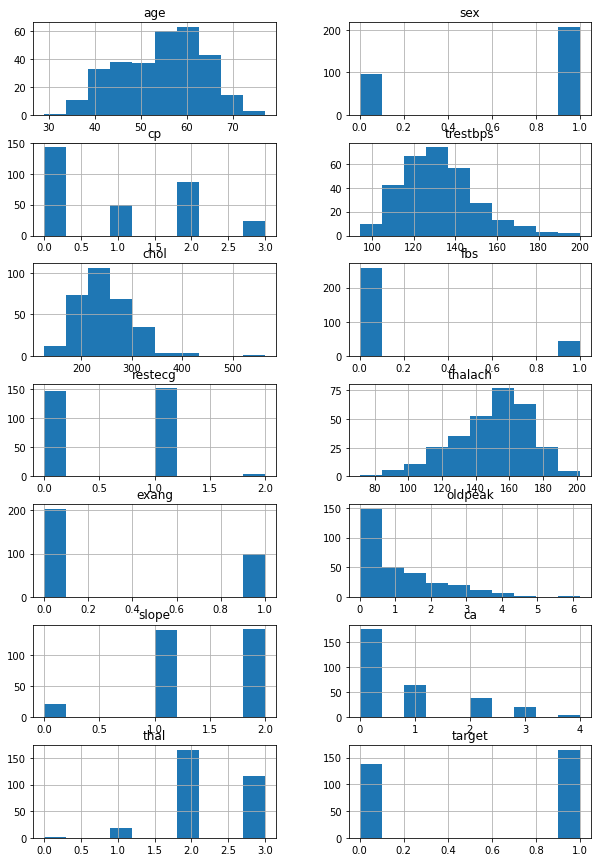

In [9]:
fig, axis = plt.subplots(7,2,figsize=(10, 15))
train.hist(ax=axis)
plt.show()

<AxesSubplot:>

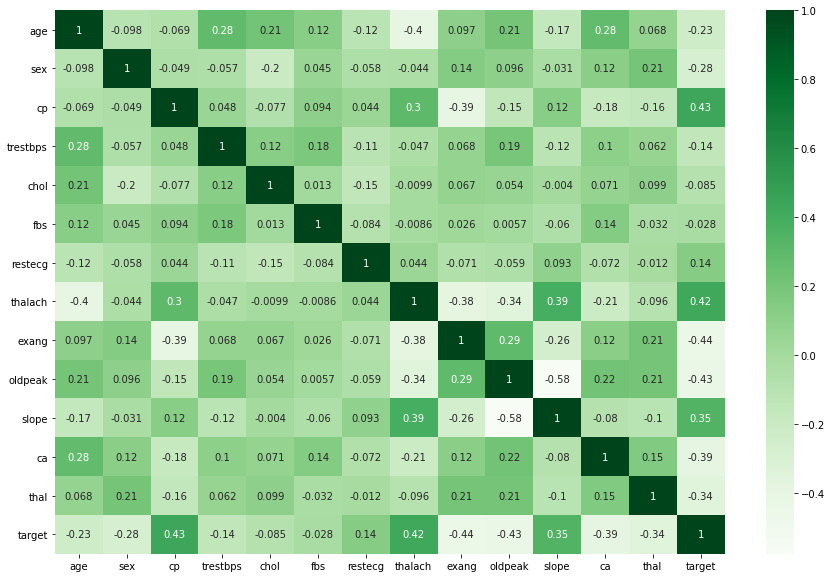

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),cmap='Greens',annot=True)

1    165
0    138
Name: target, dtype: int64

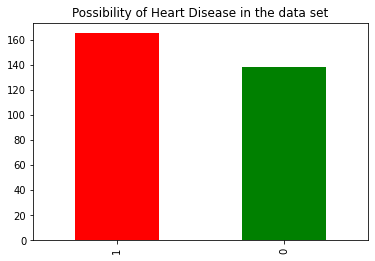

In [11]:
ax = df["target"].value_counts().plot(kind="bar", color=["red", "green"], title="Possibility of Heart Disease in the data set")

df["target"].value_counts()#0 = no heart disease, 1 = heart disease

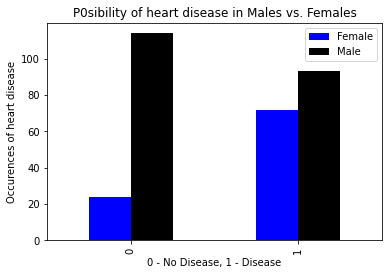

In [12]:
pd.crosstab(df.target, df.sex)
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["blue", "black"], title="P0sibility of heart disease in Males vs. Females")
plt.ylabel("Occurences of heart disease")
plt.xlabel("0 - No Disease, 1 - Disease")
plt.legend(["Female", "Male"]);

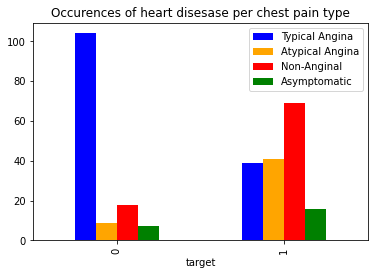

In [13]:
pd.crosstab(df.cp, df.target)
pd.crosstab(df.target, df.cp).plot(kind="bar", color=["blue", "orange", "Red", "Green"])
plt.legend(["Typical Angina", "Atypical Angina", "Non-Anginal", "Asymptomatic"])
plt.title("Occurences of heart disesase per chest pain type");

In [14]:
numeric_cols=['age','trestbps','chol','thalach','oldpeak']#numeric attributes
cat_cols=['sex','cp','fbs','restecg','exang','slope','ca','thal']#categorical attributes
df[cat_cols].nunique()

sex        2
cp         4
fbs        2
restecg    3
exang      2
slope      3
ca         5
thal       4
dtype: int64

In [15]:
df[numeric_cols].nunique()#has outliers

age          41
trestbps     49
chol        152
thalach      91
oldpeak      40
dtype: int64

Z-score normalization is a strategy of normalizing data that avoids this outlier issue. The formula for Z-score normalization is below: v a l u e − μ σ \frac{value - \mu}{\sigma} σ value−μ Here, μ is the mean value of the feature and σ is the standard deviation of the feature.

In [16]:
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)#to reduce outliers

[[0.9521966  0.68100522 1.97312292 ... 0.71442887 2.14887271 0.91452919]
 [1.91531289 0.68100522 1.00257707 ... 0.71442887 0.51292188 0.91452919]
 [1.47415758 1.46841752 0.03203122 ... 0.71442887 0.51292188 0.91452919]
 ...
 [1.50364073 0.68100522 0.93851463 ... 1.24459328 1.12302895 1.09345881]
 [0.29046364 0.68100522 0.93851463 ... 0.26508221 1.12302895 1.09345881]
 [0.29046364 1.46841752 0.03203122 ... 0.26508221 0.51292188 1.09345881]]


In [17]:
df[numeric_cols].nunique()

age          41
trestbps     49
chol        152
thalach      91
oldpeak      40
dtype: int64

In [18]:
df_outliers= df[(z >= 3).any(axis=1)] #range-3,3
df_outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


In [19]:
print(df_outliers.shape)
df_outliers= df[(z >= 3.5).any(axis=1)] 
df_outliers
print()

(16, 14)



In [20]:
df_clean=df[(z <3.5).all(axis=1)] # work with these datas,attention to the condition.
df_clean.shape

(297, 14)

In [21]:
# duplicate samples may reduce the effectiveness of the models.
duplicate = df_clean[df_clean.duplicated()]
duplicate

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [22]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [23]:
#apply one hot encoding to categorical columns with more than 2 unique value.
data = pd.get_dummies(df_clean,columns =['cp','restecg','slope','ca','thal'])
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,1,0,...,0,0,1,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,0,1,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,1,1,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,1,0,...,0,1,1,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,1,...,0,1,1,0,0,0,0,0,1,0


In [24]:
#normalization+standaraization:This scaling is done so as the model wont get stuck in local opitmal value and converge fast.
numeric_cols=['age','trestbps','chol','thalach','oldpeak']#numeric attributes
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
data[numeric_cols] = standardScaler.fit_transform(data[numeric_cols])
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.954041,1,0.797457,-0.261390,1,0.003976,0,1.200422,1,0,...,0,0,1,0,0,0,0,1,0,0
1,-1.898110,1,-0.078880,0.089237,0,1.622125,0,2.307357,1,0,...,0,0,1,0,0,0,0,0,1,0
2,-1.459318,0,-0.078880,-0.859519,0,0.966119,0,0.370221,1,0,...,0,1,1,0,0,0,0,0,1,0
3,0.186154,1,-0.663105,-0.199515,0,1.228521,0,-0.183247,1,0,...,0,1,1,0,0,0,0,0,1,0
4,0.295853,0,-0.663105,2.234250,0,0.572515,1,-0.367736,1,1,...,0,1,1,0,0,0,0,0,1,0


In [25]:
y=data['target']
y=np.array(y)
x=data.drop(columns=['target'])

In [26]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=500).fit(x, y)
selector = SelectFromModel(clf, prefit=True)
x_columns=x.columns
columns=selector.get_support()#selected list of columns with true and false values
selected_columns=list([x_columns[i] for i in range(len(columns)) if columns[i]]) #creating list of selected columns
print(selected_columns)

['age', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'cp_0', 'slope_2', 'ca_0', 'thal_2', 'thal_3']


In [27]:
x_reduced=selector.transform(x)

In [28]:
#splitting the dataset for Training and testing and using Cross validation.
from sklearn.model_selection import KFold
kf = KFold(n_splits=25)
kf.get_n_splits(x_reduced)
SVM_accuracy=[]
RF_accuracy=[]
KNN_accuracy=[]
LR_accuracy=[]

In [29]:
#Making the classifier Objects
clf_svm=SVC(kernel='linear',C =1.0)#(kernel='rbf', random_state=0, gamma=3.0,C=1.0);kernel is going to be linear, and C is equal to 1.0
clf_rf=RandomForestClassifier(max_depth=100,random_state=0)
clf_knn = KNeighborsClassifier(n_neighbors=11)
clf_lr=LogisticRegression()#(C=1,class_weight= None,penalty= 'l2', solver= 'newton-cg')#For multiclass problems

In [30]:
i=1
#starting the 25 fold cross valivation
for train_index, test_index in kf.split(x_reduced):
    i=i+1
    X_train, X_test = x_reduced[train_index], x_reduced[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model=clf_svm.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    SVM_accuracy.append(accuracy_score(y_test,y_pred))
    # Random Forest
    model=clf_rf.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    RF_accuracy.append(accuracy_score(y_test,y_pred))
    # KNN
    model=clf_knn.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    KNN_accuracy.append(accuracy_score(y_test,y_pred))
   # LR
    model=clf_lr.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    LR_accuracy.append(accuracy_score(y_test,y_pred))

In [31]:
SVM=["SVM",(sum(SVM_accuracy)/len(SVM_accuracy))]
RF=["RF",(sum(RF_accuracy)/len(RF_accuracy)) ]
KNN=["KNN",(sum(KNN_accuracy)/len(KNN_accuracy))]
LR=["LR",(sum(LR_accuracy)/len(LR_accuracy))]
data=[]
data.append(SVM)
data.append(RF)
data.append(KNN)
data.append(LR)
#results to dataframe
results=pd.DataFrame(data,columns=["Algorithms","Accuracy"])
results

,Algorithms,Accuracy
0,SVM,0.839697
1,RF,0.790000
2,KNN,0.799394
3,LR,0.843333


spliting 80-20

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
scaler=StandardScaler()
scale=scaler.fit(X_train)
X_train=scale.transform(X_train)
X_test=scale.transform(X_test)

Logistic Regression

In [33]:
from sklearn.metrics import accuracy_score
model=clf_lr.fit(X_train,y_train)
y_pred=model.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.8524590163934426


knn

In [34]:
model=clf_knn.fit(X_train,y_train)
y_pred=model.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.819672131147541


svm

In [35]:
model=clf_svm.fit(X_train,y_train)
y_pred=model.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.819672131147541


random forest

In [36]:
model=clf_rf.fit(X_train,y_train)
y_pred=model.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.8688524590163934


In [37]:
#one_hot = OneHotEncoder(handle_unknown='ignore')
#cat_features = ["cp", "thal"]
#transformer = ColumnTransformer([("one_hot", one_hot, cat_features)], remainder="passthrough")
#X_train_onehot = pd.DataFrame(transformer.fit_transform(X_train))
#X_test_onehot = pd.DataFrame(transformer.fit_transform(X_test))

In [38]:
#print(X_train_onehot)

In [40]:
"""scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_onehot))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test_onehot))
#print(X_train_scaled )"""

NameError: name 'X_train_onehot' is not defined